In [2]:
# pip install pandas

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
data['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [6]:
def area_rule(row):
    if row['LotArea'] < 4356:
        return 'Very small'
    elif row['LotArea'] >= 4356 and row['LotArea'] < 8712:
        return 'Small'
    elif row['LotArea'] >= 8712 and row['LotArea'] < 13068:
        return 'Medium'
    elif row['LotArea'] >= 13068 and row['LotArea'] < 21780:
        return 'Large'
    else:
        return 'Huge'

In [7]:
data['LotArea Label'] = data.apply(area_rule, axis=1)

In [8]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotArea Label
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,Small
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,Medium
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,Medium
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,Medium
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,Large


In [13]:
# pip install matplotlib

<Axes: >

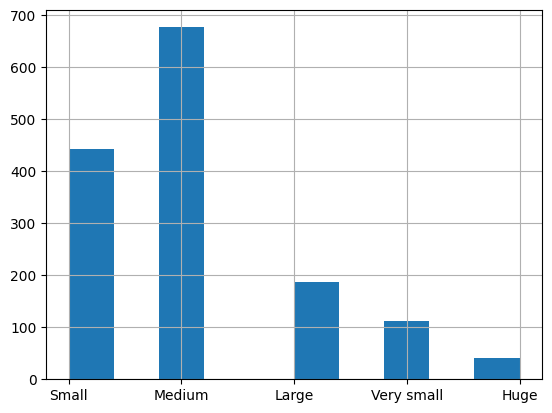

In [13]:
data['LotArea Label'].hist()

In [18]:
data = pd.read_csv('movie.csv', engine='python', encoding='utf-8', on_bad_lines='skip')

In [19]:
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


array([[<Axes: title={'center': 'label'}>]], dtype=object)

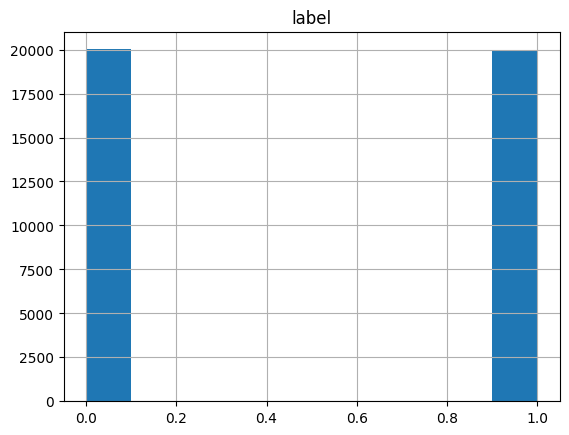

In [20]:
data.hist()

Задание 5

In [17]:
# pip install scikit-learn

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

In [27]:
labeled_reviews, unlabeled_reviews = train_test_split(data, train_size=0.25, random_state=33)

In [28]:
labeled_reviews

,text,label
39032,One of the most nihilistic and brutal films I'...,1
11292,I saw this movie in my international cinema cl...,0
8970,"""The house of the spirits"" is quite awful. I l...",0
5974,"Well, you know the rest! This has to be the wo...",0
7154,No artful writeup here because it doesn't dese...,0
...,...,...
27282,I absolutely fell in love with this girls. let...,1
578,Latter days is the best gay movie of the homos...,1
38616,I really enjoyed this film. All aspects of the...,1
2439,I was able to hang in for only the first twent...,0


In [29]:
unlabeled_reviews

,text,label
5502,"I don't hand out ""ones"" often, but if there wa...",0
36357,I have grown up pouring over the intertwined s...,0
23479,"I wasn't so impressed with this film, finding ...",0
19736,Bill and Ted's Bogus Journey is the sequel to ...,1
29026,I consider myself a big fan of low budget horr...,0
...,...,...
5043,"Maybe it's the dubbing, or maybe it's the endl...",0
19969,I'm pretty sure Poe would have considered this...,0
9378,midnight madness is the ultimate scavenger hun...,1
11825,"*Wonderland SPOILERS* <br /><br />July 1st, 19...",1


In [24]:
def train_model(labeled_data):
    vector = TfidfVectorizer()
    x = vector.fit_transform(labeled_data['text'])
    y = labeled_data['label']
    model = LogisticRegression()
    model.fit(x,y)
    return model, vector

In [30]:
model, vector = train_model(labeled_reviews)

In [32]:
x_unlabeled = vector.transform(unlabeled_reviews['text'])
y_unlabeled_predicted = model.predict(x_unlabeled)

In [35]:
import numpy as np

In [33]:
y_unlabeled_proba = model.predict_proba(x_unlabeled)

In [36]:
uncertainty = -(y_unlabeled_proba * np.log2(y_unlabeled_proba)).sum(axis=1)

In [37]:
uncertainty

array([0.21833406, 0.9881027 , 0.87232129, ..., 0.45418782, 0.74967954,
       0.67071814])

In [38]:
new_labeled = unlabeled_reviews.iloc[uncertainty.argsort()[:100]]

In [39]:
new_unlabeled = unlabeled_reviews.iloc[uncertainty.argsort()[100:]]

In [40]:
new_labeled

,text,label
21449,"Terrible acting, lame plot, stupid story and j...",0
7604,This is just the same old crap that is spewed ...,0
27102,"This is complete and absolute garbage, a fine ...",0
27881,"I would have given it a one instead of a two, ...",0
4003,I rented this movie today... worst movie EVER....,0
...,...,...
7504,"Bad editing, bad production values, bad contin...",0
3188,Why do people make bad movies? Didn't anyone w...,0
30059,I understand that the budget was low on this f...,0
6948,This is one of the worst movies I saw! I dunno...,0


In [41]:
new_unlabeled

,text,label
18337,This is the single worst movie I have ever see...,0
17239,that got destroyed quickly by the poor quality...,0
10499,"Okay, so when a friend of mine told me he was ...",0
37218,This flick reminds me some really bad science-...,0
37810,a very surprisingly underrated movie. very rea...,1
...,...,...
25684,I've probably been spoilt by having firstly se...,0
18039,"For sheer quality of performance and the ""thea...",1
37599,While the story of a troubled kid turning to b...,1
38723,I just saw this movie in a sneak preview and b...,1


In [42]:
new_labeled_reviews = pd.concat([labeled_reviews, new_labeled])

In [43]:
new_labeled_reviews

,text,label
39032,One of the most nihilistic and brutal films I'...,1
11292,I saw this movie in my international cinema cl...,0
8970,"""The house of the spirits"" is quite awful. I l...",0
5974,"Well, you know the rest! This has to be the wo...",0
7154,No artful writeup here because it doesn't dese...,0
...,...,...
7504,"Bad editing, bad production values, bad contin...",0
3188,Why do people make bad movies? Didn't anyone w...,0
30059,I understand that the budget was low on this f...,0
6948,This is one of the worst movies I saw! I dunno...,0


In [44]:
model2, vector2 = train_model(new_labeled_reviews)

In [46]:
new_unlabeled

,text,label
18337,This is the single worst movie I have ever see...,0
17239,that got destroyed quickly by the poor quality...,0
10499,"Okay, so when a friend of mine told me he was ...",0
37218,This flick reminds me some really bad science-...,0
37810,a very surprisingly underrated movie. very rea...,1
...,...,...
25684,I've probably been spoilt by having firstly se...,0
18039,"For sheer quality of performance and the ""thea...",1
37599,While the story of a troubled kid turning to b...,1
38723,I just saw this movie in a sneak preview and b...,1


In [62]:
x_test = vector2.transform(new_unlabeled['text'])
y_test_predicted = model2.predict(x_test)

In [63]:
f1 = f1_score(new_unlabeled['label'], y_test_predicted)
f1

0.8745202243873634

87,45% предсказаний модели совпали. Считаю, что модель эффективна, но могло быть и лучше, так как шанс ошибки - 12,55%.